<a href="https://colab.research.google.com/github/melvinaquartey/ml-homework/blob/main/Homework5_Prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN on MNIST digits

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))

# First max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Second max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Flatten layer
model.add(layers.Flatten())

# Dense layer with 64 neurons
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

170498071/170498071 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                       

Epoch 1/10
782/782 [==============================] - 102s 124ms/step - loss: 1.6517 - accuracy: 0.3938 - val_loss: 1.4230 - val_accuracy: 0.4771
Epoch 2/10
782/782 [==============================] - 91s 116ms/step - loss: 1.3295 - accuracy: 0.5226 - val_loss: 1.2465 - val_accuracy: 0.5596
Epoch 3/10
782/782 [==============================] - 90s 115ms/step - loss: 1.1877 - accuracy: 0.5776 - val_loss: 1.1661 - val_accuracy: 0.5877
Epoch 4/10
782/782 [==============================] - 96s 123ms/step - loss: 1.0909 - accuracy: 0.6133 - val_loss: 1.0968 - val_accuracy: 0.6095
Epoch 5/10
782/782 [==============================] - 89s 114ms/step - loss: 1.0182 - accuracy: 0.6417 - val_loss: 1.1030 - val_accuracy: 0.6125
Epoch 6/10
782/782 [==============================] - 87s 112ms/step - loss: 0.9616 - accuracy: 0.6642 - val_loss: 1.0019 - val_accuracy: 0.6483
Epoch 7/10
782/782 [==============================] - 89s 113ms/step - loss: 0.9052 - accuracy: 0.6829 - val_loss: 0.9602 - val_a

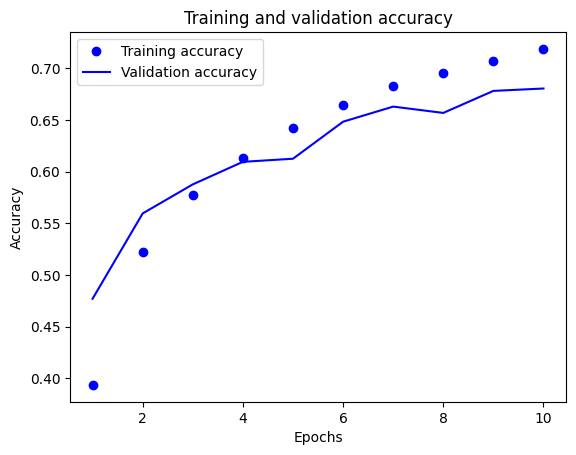

In [2]:
import matplotlib.pyplot as plt

# Train the model with batch size of 64 and store training history
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Get training and validation accuracies
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracies
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


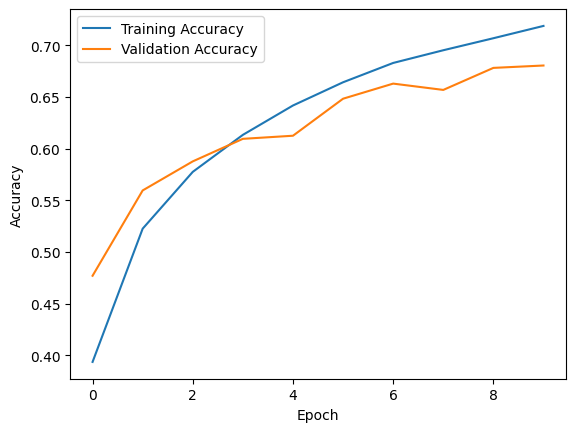

In [3]:
# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()